## imports

In [1]:
import json
import gzip
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
%matplotlib inline

## load sample

In [2]:
data = []
with open('sample.json') as f:
  for line in f.readlines():
    data.append(json.loads(line))

In [3]:
df = json_normalize(data)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600


## load review data

In [5]:
data = []
with gzip.open('Video_Games_5.json.gz','rt') as f:
  for line in f:
    data.append(json.loads(line))

In [6]:
len(data)

497577

In [7]:
df = json_normalize(data)

In [8]:
df.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,style.Package Type:,style.Package Quantity:,style.Item Package Quantity:,style.Pattern:,style.Platform for Display:,style.Style Name:,style.Denomination:,style.Offer Type:,style.Configuration:,style.Color Name:
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,1415836800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,False,"08 2, 2014",A1KXJ1ELZIU05C,0700026657,Creation27,"I'm an avid gamer, but Anno 2070 is an INSULT ...",Avoid This Game - Filled with Bugs,1406937600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,True,"03 3, 2014",A1WK5I4874S3O2,0700026657,WhiteSkull,I bought this game thinking it would be pretty...,A very good game balance of skill with depth o...,1393804800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,True,"02 21, 2014",AV969NA4CBP10,0700026657,Travis B. Moore,I have played the old anno 1701 AND 1503. thi...,Anno 2070 more like anno 1701,1392940800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.0,True,"06 27, 2013",A1EO9BFUHTGWKZ,0700026657,johnnyz3,"I liked it and had fun with it, played for a w...",Pretty fun,1372291200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['overall'].describe()

count    497577.000000
mean          4.220456
std           1.185424
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

## Plot of product ratings

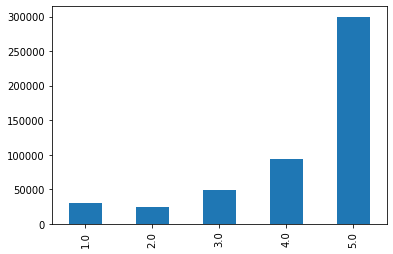

In [10]:
df['overall'].value_counts().sort_index().plot(kind='bar')

## Sampling the reviews

In [11]:
df.shape

(497577, 30)

In [12]:
rows_total = df.shape[0]

Get 10 random reviews

In [13]:
idx = [np.random.randint(1, rows_total) for _ in range(10)]
for i in idx:
  print(f"-- item {i}:")
  print(df.loc[i].reviewText)
  print("\n")

-- item 56722:
This game will not work with 10.4.2, unless you use the Aspyr-provided workaround. Here's what they had to say:

There are currently some issues with the video card drivers in OS 10.4. A future operating system update should correct this, but there is a workaround that you can use in the meantime.

In the Finder, go to your home folder, open the Library/Preferences/Knights of the Old Republic folder.

Double click the 'swkotor.ini' file to edit it in TextEdit

Scroll down to the section [Graphics Options], and add the line "Disable Vertex Buffer Objects=1" (without quotes)

Save the swkotor.ini file and close it.


-- item 310489:
This headset is not worth the money at all.

First, you would expect something really good for the price it costs but no. That's right, this one costs $150+ dollars. It only come with the Xbox One adapter, no bass or EQ controls. You are stuck with the mediocre quality, sound and uncomfortable head piece.

What made me give this headset the wor